## k-means进行数据聚类  
k-means是一种搜寻中心的无监督算法，是一种迭代的不确定方法。  
* 迭代 算法的步骤不断重复，直到达到收敛的那一步  
* 不确定 算法的初值不同，最终得到的聚类结果可能不同

k-means需要指定簇的数量k来作为算法的输入参数，至于如何选择k的值，目前还没有什么好办法，只能通过多次运算比较结果来确定

评估结果的质量：  
* 簇的内聚，同一个簇里点相互靠近  
* 簇的分散，不同簇里的点相互远离   

准备工作：
k-means产生的每个簇都可以用以下的指标进行评估  
* 簇的位置 簇中心的坐标。
    k-means初始化的时候随机选择一个点作为中心点，然后每个步骤迭代找到一个新的中心，在这个新的中心附近的点都相似，并被划分到同一个组 
* 簇的半径 簇内每个点到簇中心的距离的平均差  
* 簇的规模 簇内的点的数量  
* 簇的密度 簇的规模和簇的半径的比值  

采用所谓的轮廓系数来评估k-means的结果，它的值介于-1~1  
* 负值说明簇的半径大于簇之间的距离（两个簇之间有重叠，聚类效果差）  
* 值越大，越接近1，则表明聚类的结果越好  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_random_data():
    x_1 = np.random.normal(loc=0.2,scale=0.2,size=(100,100))
    x_2 = np.random.normal(loc=0.9,scale=0.1,size=(100,100))
    
    x = np.r_[x_1,x_2]
    return x

In [2]:
x = get_random_data()
print x

[[ 0.01741457  0.54055647  0.18663902 ...,  0.19115549  0.07362466
   0.39132716]
 [ 0.13293776  0.23102296  0.17733862 ...,  0.40941615  0.25382605
   0.15081975]
 [ 0.26011027  0.10276115  0.68216534 ...,  0.50468251  0.43123449
   0.21328265]
 ..., 
 [ 0.7167998   1.06126506  0.95383362 ...,  0.72420064  1.01718388
   0.76892851]
 [ 0.88563259  0.80096669  0.8614204  ...,  1.04791234  0.87893855
   0.94252441]
 [ 0.96391381  0.89287327  1.02425404 ...,  0.84352767  0.77462956
   0.75583833]]


In [5]:
print np.shape(x)

(200, 100)


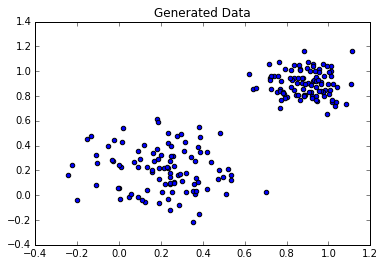

In [6]:
# plot 
plt.cla()
plt.figure(1)
plt.title("Generated Data")
plt.scatter(x[:,0],x[:,1])
plt.show()

In [8]:
# 我们定义一个函数来执行k-means算法，就能对给定的数据进行聚类
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
def form_clusters(x,k):
    '''
    build cluster
    '''
    # k是划分出的簇的个数
    no_clusters = k
    model = KMeans(n_clusters=no_clusters,init='random')
    model.fit(x)
    labels = model.labels_
    print labels
    
    # 计算轮廓系数
    sh_score = silhouette_score(x,labels)
    return sh_score

In [12]:
sh_scores = []
for i in range(1,5):
    sh_score = form_clusters(x,i+1)
    sh_scores.append(sh_score)
no_clusters = [i+1 for i in range(1,5)]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 2 0 0 0 2 0 0 2 0 0 2 0 2 0 2 2 2 0 2 0 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 0
 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 2 2 2 0 2 2 2 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 1 1 1 3 3 3 3 1 1 1 2 1 1 1 3 3 2 2 2 3 3 1 3 1 1 1 1 1 1 3 1 1 2 1 3 1
 3 3 1 2 1 1 1 3 3 2 3 1 3 1 1 2 2 3 2 3 1 3 3 3 2 1 2 3 1 2 1 3 3 1 1 2 1
 3 2 1 1 1 2 1 1 3 1 1 1 1 1 2 3 3 3

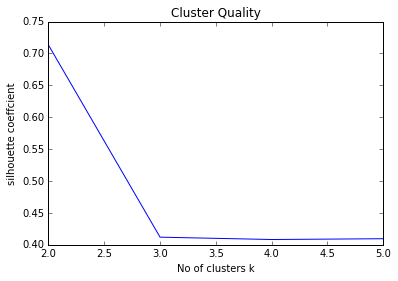

In [13]:
# plot 
plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title('Cluster Quality')
plt.xlabel('No of clusters k')
plt.ylabel('silhouette coeffcient')
plt.show()